# Dijkstras algorithm

The Dijkstra algorithm provides a solution for the finding the shortest path through a graph problem. This means, for a given starting point (= node/vertex), the shortest path is found. A path means, that all nodes are visited exactly once in such a manner, that the distance between them is minimal. The distance is represented by the weights of the edges/brances connecting nodes. There could be several edges to choose from with different weight and therefore distance. The algorithm assumes, that you can find the global minimum (shortest path) by choosing local minima (from each node the shortest edge to a neighboring node is picked). 

The original alorithmic approach is based on set theory and works with 3 sets of nodes and 3 sets of edges. Set A contains the visited nodes, Set B contains the neighboring nodes to the currently visited node and Set C contains the unvisited nodes. Accordingly, Set 1 contains the shortes edges between the nodes in Set A, Set 2 contains the edges of the neighboring edges and Set 3 contains the remaining edges (which can be rejected or not used ones). The shortest path is then found by picking an arbitrary node as starting node and transferring it from Set C to Set B. There are edges transferred to Set 2 if the node has an edge to itself. Anyway the distance (length of the edge) of the node to itself is 0. So the node can be transferred to Set A. While Set 1 is still empty. Now the neighboring nodes are put into Set B, while the edges between them are put into Set 2. Then the edge with the shortest distance in Set B is picked and transferred to Set 1. The other edges are rejected. The edge connecting the starting node with closest neighboring node is picked and transferred to the visited nodes. For this added node the neighboring nodes are transferred to Set B and the branches are accordingly put to Set 2. Then againg the shortest distanced node is picked by comparing the edge lenghts. The shortest one is picked. This picking of local minima is assumed to result in the global shortest path.

When implementing the algorithm one important addition is made. The distance from the starting node to each new node is added, this prevents choosing paths which are more costly than others in total. See the following example. We have a graph with 5 nodes A to E. Node A is picked as starting node. The distance of node A to itself is 0 the other distances are unknown and will therefore be set to infinity. Next, the neighboring/adjacent nodes to node A are searched. For each of the neighboring nodes the distance is calculated to the node A by simply adding the distance of the neighboring nodes to A to itself (0). In this example, neighboring nodes are D with a distance of 1 and B with a distance of 6. AB = 0 + 6 and AD = 0 + 1. Now we check whether the distance is smaller than the distance we already know. Since all distances were set to infinity, we overwrite the distance for B with a 6 and the distance for D with a 1. For the next step: put A to the set of visited nodes; then pick the node with the shortest distance, in this case it is node D. For node D find the neighboring nodes; in this case D's unvisited neighbors are B and E. The distance of A to E through D is 0 + 1 + 1 = 2 and the distance of A through D to B is 0 + 1 + 2 = 3. Check whether the distances are smaller than the ones already recorded: for E the distance was infinity, so overwrite, for B the distance was 6, so overwrite. Second repeat: put D in the set of visited nodes; then pick the node with the shortest distance: this is now E with a distance of 2. Now find the neighbors of E: B and C. Calculate the distance ADEB = 0 + 1 + 1 + 2 = 4 and ADEC = 0 + 1 + 1 + 5 = 7. Do not update distance for B, update distance for C. Third repetition: put E to visited nodes set. Pick the edge with the shortest distance: B. Find unvisited neighbors of B: C, calculate the distance ADEBC = 0 + 1 + 1 + 2 + 5 = 9. do not update the distance because 7 is lower. Fourth repetition: Add node B to the set of visited nodes. Pick the node with the shortest distance, which is C the only remaining node. Find the unvisited neighbors, there are none. Do not update the distance. Fifth repetition: add node C to visited. No new nodes need to be visited, so we found our shortest path, which is: A-D-E-B-C. 

Note the graphs used with this method are undirected paths, therefore, the edge between node 1 and 2 is the same as the edge between node 2 and 1.

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

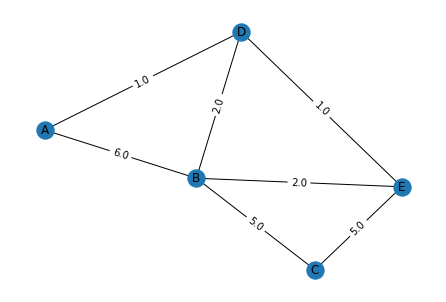

In [3]:
# contruct a graph
G = nx.Graph()
G.add_edge('A', 'B', weight = 6.)
G.add_edge('A', 'D', weight = 1.)
G.add_edge('B', 'D', weight = 2.)
G.add_edge('B', 'C', weight = 5.)
G.add_edge('B', 'E', weight = 2.)
G.add_edge('C', 'E', weight = 5.)
G.add_edge('D', 'E', weight = 1.)

# show graph
pos = nx.spring_layout(G) #, k=10
nx.draw(G, pos, with_labels=True)
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [15]:
distance = {}
for node in list(G.nodes):
    distance.update({node: np.inf})
    distance['A'] = 0

g = G.adj['A']

for adj, weights in g.items():
    dist = distance['A'] + weights['weight']
    print(dista)

6.0
1.0


In [28]:
def Dijkstra_shortest_path(Graph, starting_node):
    """
    The Dijkstras shortest path algorithm calculates the shortest path (every node is visited only once
    and each edge is used only one) through a graph with visiting all nodes given. (Problems arising 
    by this path not exisiting for a graph are not handeled)
    
    :param
    ---------
    Graph: a graph of any size for which the shortest path shall be evaluated (graph object)
    starting_node: user defines the starting node (str)
    
    :returns
    ---------
    visited_nodes: List with nodes in order of the path
    """
    
    # first no visitied nodes
    visited_nodes = []

    # all nodes from the graph
    unvisited_nodes = list(Graph.nodes)

    # set starting node
    starting_node = starting_node

    # initialize the distance dictionary with 0 for the starting node and inf for the others
    distance = {}
    for node in list(Graph.nodes):
        distance.update({node: np.inf})
    distance[starting_node] = 0

    # calculate the length of while loop by calcualating the number of unvisited nodes
    #length = len(unvisited_nodes)

    # initialize the current node with the starting node
    current_node = starting_node
    # initialze the visited nodes with the starting node == current node
    visited_nodes.append(current_node)
    # initialize the unvisited nodes by removing the starting node == current node == visited node
    unvisited_nodes.remove(current_node)
    
    while len(unvisited_nodes) > 0:
        # remove current node from the distance dictionary, because it has the shortest distance to itself
        distance.pop(current_node)

        # find adjacent nodes to the current node
        adj_nodes = G.adj[current_node]

        # only for the unvisited adjacent nodes: update distance dictionary if the distance is shorter
        for node in adj_nodes.keys():
            if node in unvisited_nodes:
                #for adj, weights in adj_nodes.items():
                    #dist = distance[current_node] + weights['weight']
                    #if adj_nodes[node]['weight'] < dist:
                    #distance[node] = adj_nodes[node]['weight']
                if adj_nodes[node]['weight'] < distance[node]:
                    distance[node] = adj_nodes[node]['weight']
        #print('updated distance dict:', distance)


        # pick the new current node by finding the edge with the shortest distance
        current_node = min(distance, key = distance.get)
        #print('new current node:', current_node)

        # add new current node to the visited nodes
        visited_nodes.append(current_node)
        #print('visited nodes:', visited_nodes)
        
        # remove it from the unvisited
        unvisited_nodes.remove(current_node)
        #print('unvisited nodes:', unvisited_nodes)
    
    path = visited_nodes
    
    return path
    

In [29]:
# test code
Dijkstra_shortest_path(Graph = G, starting_node = 'A')

['A', 'D', 'E', 'B', 'C']